# US Flight Delay Analysis - Winter Season (2018-2019)

Description: This notebook contains the main analysis and representations of the Air Traffic Delay Study, in the following fields of study: airports, routes and carriers.

Each phase of the process followed is indicated by cronological order.

### Imports:

In [30]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import os

#Visualitzation
import matplotlib.pyplot as plt
import seaborn as sbn

# 01. Data Loading

In [31]:
#Winter Season dataset
df = pd.read_csv('C:\\Users\\GerardEspejo\\Desktop\\TFM\\Data\\Winter_Season2.csv')
df.sample(5)

,Unnamed: 0,Year,Quarter,Month,DayOfMonth,DayOfWeek,FlightDate,UniqueCarrier,Carrier,RegistrationNum,...,CRSElapsedTimeMin,ActualElapsedTimeMin,FlightTimeMin,NumberOfFlights,DistanceMil,Distance_Int250Mil,DepTime2,ArrTime2,DepDateTime,ArrDateTime
1333624,1333624,2019,1,2,20,3,2019-02-20,9E,9E,N600LR,...,86.0,NaN,NaN,1.0,209.0,1,NaN,NaN,NaN,NaN
556586,556586,2018,4,12,31,1,2018-12-31,AA,AA,N986AN,...,347.0,370.0,322.0,1.0,2724.0,11,11:50,21:00,2018-12-31 11:50:00,2018-12-31 21:00:00
683579,683579,2019,1,1,26,6,2019-01-26,AA,AA,N557UW,...,113.0,90.0,73.0,1.0,544.0,3,16:05,17:35,2019-01-26 16:05:00,2019-01-26 17:35:00
52879,52879,2018,4,12,1,6,2018-12-01,MQ,MQ,N232NN,...,189.0,199.0,163.0,1.0,1041.0,5,10:04,13:23,2018-12-01 10:04:00,2018-12-01 13:23:00
445727,445727,2018,4,12,23,7,2018-12-23,OO,OO,N754SK,...,127.0,120.0,89.0,1.0,630.0,3,05:59,07:59,2018-12-23 05:59:00,2018-12-23 07:59:00


# 02. Data Analysis

In [10]:
df.shape

(1711002, 49)

In [11]:
df.columns

Index(['Unnamed: 0', 'Year', 'Quarter', 'Month', 'DayOfMonth', 'DayOfWeek',
       'FlightDate', 'UniqueCarrier', 'Carrier', 'RegistrationNum',
       'FlightNum', 'OriginAirport_IDNum', 'OriginCityMarket_IDNum',
       'Origin_IATA', 'OriginCityName', 'OriginState_ID', 'OriginStateName',
       'OriginWAC', 'DestAirport_IDNum', 'DestCityMarket_IDNum', 'Dest_IATA',
       'DestCityName', 'DestState_ID', 'DestStateName', 'DestWAC',
       'CRSDepTime', 'DepTime', 'DepDelayMin', 'DepDelayMin0',
       'DepDelay_Ind15', 'DepDelayGroup_Int15', 'CRSArrTime', 'ArrTime',
       'ArrDelayMin', 'ArrDelayMin0', 'ArrDelay_Ind15', 'ArrDelayGroup_Int15',
       'Cancelled', 'Diverted', 'CRSElapsedTimeMin', 'ActualElapsedTimeMin',
       'FlightTimeMin', 'NumberOfFlights', 'DistanceMil', 'Distance_Int250Mil',
       'DepTime2', 'ArrTime2', 'DepDateTime', 'ArrDateTime'],
      dtype='object')

## Air Traffic Delay Study

### Initial Exploratory:

##### Delay Distribution (All flights)

In [12]:
df.columns

Index(['Unnamed: 0', 'Year', 'Quarter', 'Month', 'DayOfMonth', 'DayOfWeek',
       'FlightDate', 'UniqueCarrier', 'Carrier', 'RegistrationNum',
       'FlightNum', 'OriginAirport_IDNum', 'OriginCityMarket_IDNum',
       'Origin_IATA', 'OriginCityName', 'OriginState_ID', 'OriginStateName',
       'OriginWAC', 'DestAirport_IDNum', 'DestCityMarket_IDNum', 'Dest_IATA',
       'DestCityName', 'DestState_ID', 'DestStateName', 'DestWAC',
       'CRSDepTime', 'DepTime', 'DepDelayMin', 'DepDelayMin0',
       'DepDelay_Ind15', 'DepDelayGroup_Int15', 'CRSArrTime', 'ArrTime',
       'ArrDelayMin', 'ArrDelayMin0', 'ArrDelay_Ind15', 'ArrDelayGroup_Int15',
       'Cancelled', 'Diverted', 'CRSElapsedTimeMin', 'ActualElapsedTimeMin',
       'FlightTimeMin', 'NumberOfFlights', 'DistanceMil', 'Distance_Int250Mil',
       'DepTime2', 'ArrTime2', 'DepDateTime', 'ArrDateTime'],
      dtype='object')

In [13]:
delay = df[['ArrDelayMin', 'ArrDelayMin0', 'ArrDelay_Ind15', 'ArrDelayGroup_Int15']]
delay.sample(5)

,ArrDelayMin,ArrDelayMin0,ArrDelay_Ind15,ArrDelayGroup_Int15
101721,18.0,18.0,1.0,1.0
886094,-10.0,0.0,0.0,-1.0
842425,-12.0,0.0,0.0,-1.0
257984,-14.0,0.0,0.0,-1.0
1337009,74.0,74.0,1.0,4.0


In [14]:
arrdelay = df['ArrDelayMin'].describe().apply(lambda x: format(x, 'f'))
arrdelay0 = df['ArrDelayMin0'].describe().apply(lambda x: format(x, 'f'))
arrdelay_Ind15 = df['ArrDelay_Ind15'].describe().apply(lambda x: format(x, 'f'))
arrdelay_Group_Int15 = df['ArrDelayGroup_Int15'].describe().apply(lambda x: format(x, 'f'))

data = {'Arrival': arrdelay, 'ArrDelayMin0': arrdelay0,
       'ArrDelayMin_Ind15': arrdelay_Ind15, 'ArrDelayGroup_Int15': arrdelay_Group_Int15}
description = pd.DataFrame(data)
description

,Arrival,ArrDelayMin0,ArrDelayMin_Ind15,ArrDelayGroup_Int15
count,1668014.000000,1668014.000000,1668014.000000,1668014.000000
mean,5.321637,14.237462,0.199867,-0.176197
std,50.973347,47.342975,0.399900,2.394602
min,-117.000000,0.000000,0.000000,-2.000000
25%,-15.000000,0.000000,0.000000,-1.000000
50%,-6.000000,0.000000,0.000000,-1.000000
75%,9.000000,9.000000,0.000000,0.000000
max,2649.000000,2649.000000,1.000000,12.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027B96407320>,
      dtype=object)

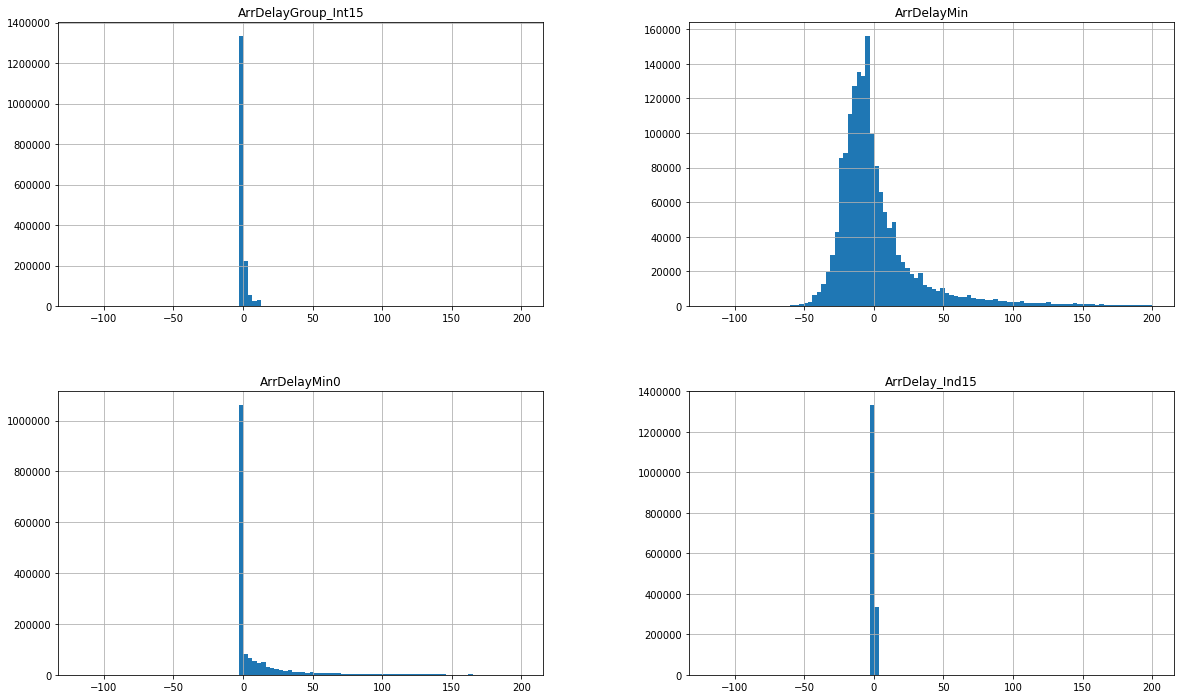

In [15]:
delay.hist(range=[min(df['ArrDelayMin']),200], bins=100, figsize=(20,12))

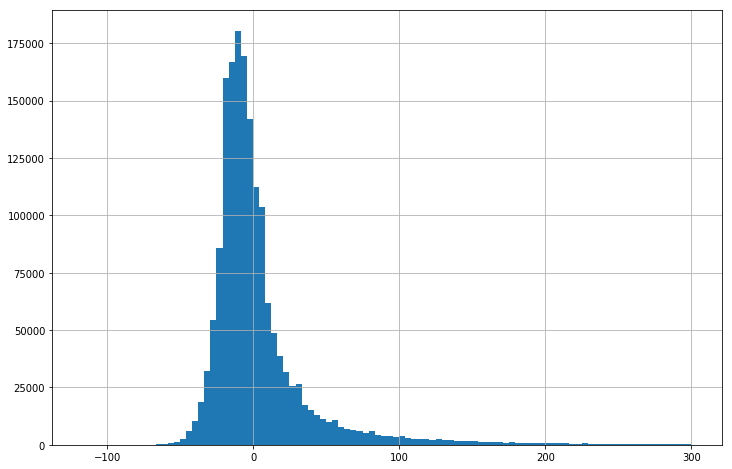

In [16]:
delay['ArrDelayMin'].hist(range=[min(df['ArrDelayMin']),300], bins=100, figsize=(12,8))

##### Delay Distribution (Only delayed flights)

In [17]:
df['delayed'] = df['ArrDelayMin'].apply(lambda x: x > 0)
delayed = df[df['delayed']==True]

In [18]:
delay2 = delayed[['ArrDelayMin', 'ArrDelayMin0', 'ArrDelay_Ind15', 'ArrDelayGroup_Int15']]
delay2.sample(5)

,ArrDelayMin,ArrDelayMin0,ArrDelay_Ind15,ArrDelayGroup_Int15
1538293,101.0,101.0,1.0,6.0
798551,2.0,2.0,0.0,0.0
705340,59.0,59.0,1.0,3.0
968238,5.0,5.0,0.0,0.0
1002680,5.0,5.0,0.0,0.0


In [19]:
arrdelay = delayed['ArrDelayMin'].describe().apply(lambda x: format(x, 'f'))
arrdelay0 = delayed['ArrDelayMin0'].describe().apply(lambda x: format(x, 'f'))
arrdelay_Ind15 = delayed['ArrDelay_Ind15'].describe().apply(lambda x: format(x, 'f'))
arrdelay_Group_Int15 = delayed['ArrDelayGroup_Int15'].describe().apply(lambda x: format(x, 'f'))

data2 = {'Arrival': arrdelay, 'ArrDelayMin0': arrdelay0,
       'ArrDelayMin_Ind15': arrdelay_Ind15, 'ArrDelayGroup_Int15': arrdelay_Group_Int15}
description2 = pd.DataFrame(data2)
description2

,Arrival,ArrDelayMin0,ArrDelayMin_Ind15,ArrDelayGroup_Int15
count,605696.000000,605696.000000,605696.000000,605696.000000
mean,39.208260,39.208260,0.550410,1.895850
std,72.065054,72.065054,0.497453,2.922830
min,1.000000,1.000000,0.000000,0.000000
25%,7.000000,7.000000,0.000000,0.000000
50%,17.000000,17.000000,1.000000,1.000000
75%,43.000000,43.000000,1.000000,2.000000
max,2649.000000,2649.000000,1.000000,12.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027B969A83C8>,
      dtype=object)

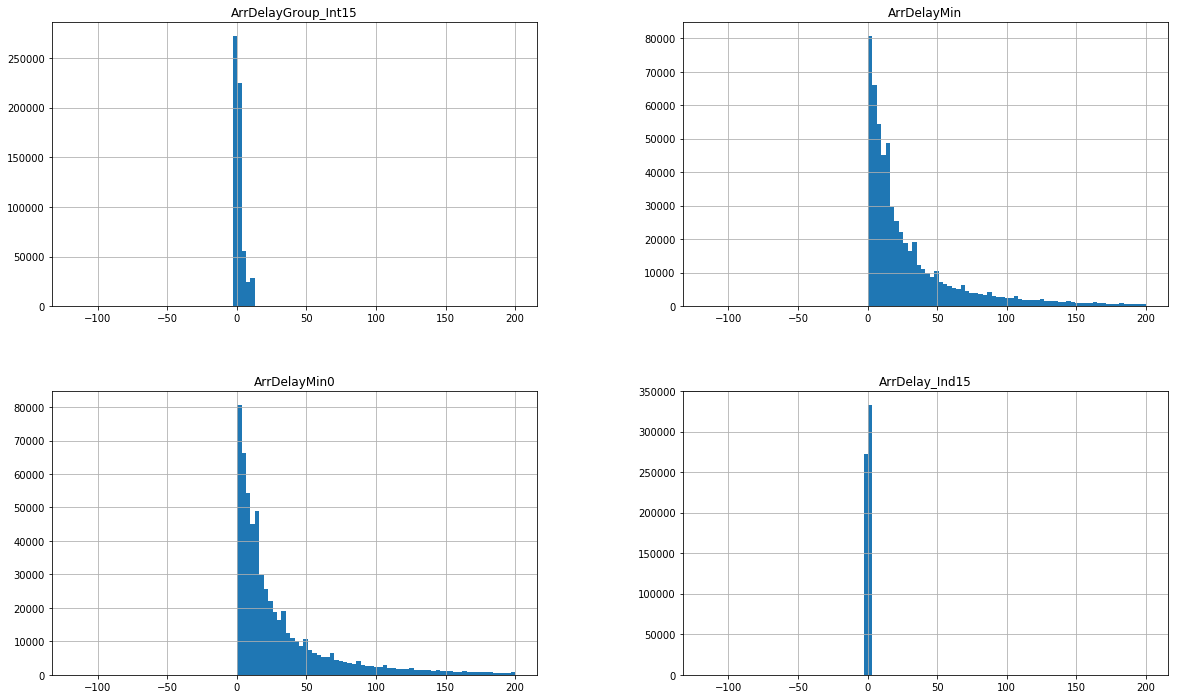

In [20]:
delay2.hist(range=[min(df['ArrDelayMin']),200], bins=100, figsize=(20,12))

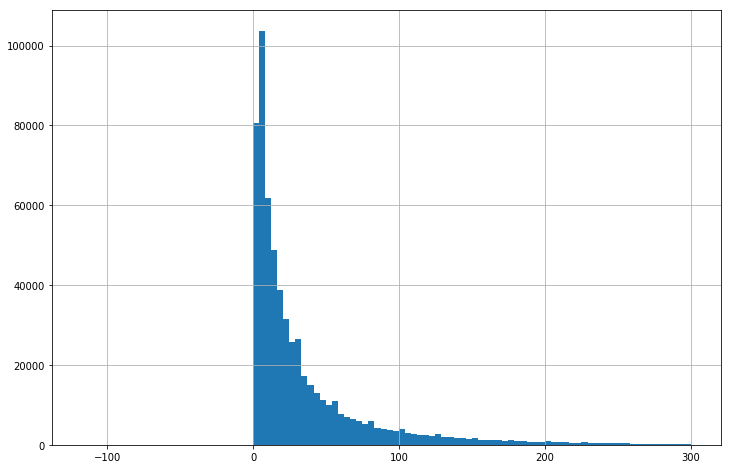

In [21]:
delay2['ArrDelayMin'].hist(range=[min(df['ArrDelayMin']),300], bins=100, figsize=(12,8))

##### Delay Distribution Comparison: All flights vs. Delayed Flights

In [22]:
arrdelay = df['ArrDelayMin'].describe().apply(lambda x: format(x, 'f'))
arrdelay_delayed = delayed['ArrDelayMin'].describe().apply(lambda x: format(x, 'f'))

data3 = {'TOTAL_Flights': arrdelay, 'DELAYED_Flights': arrdelay_delayed}
description3 = pd.DataFrame(data3)
description3

,TOTAL_Flights,DELAYED_Flights
count,1668014.000000,605696.000000
mean,5.321637,39.208260
std,50.973347,72.065054
min,-117.000000,1.000000
25%,-15.000000,7.000000
50%,-6.000000,17.000000
75%,9.000000,43.000000
max,2649.000000,2649.000000


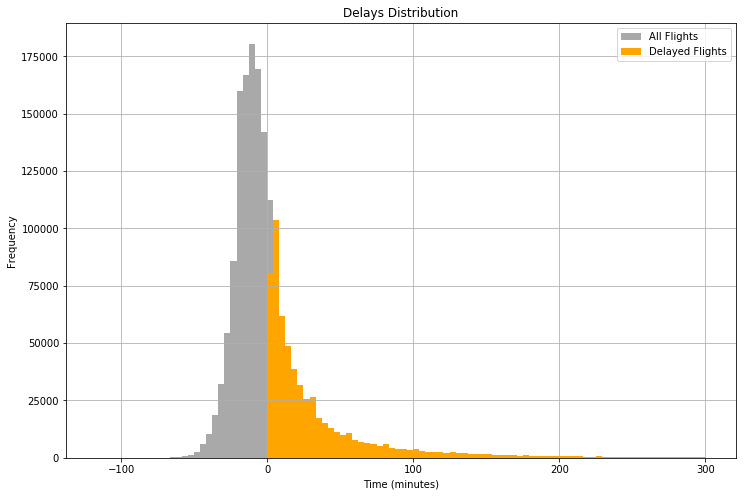

In [28]:
delay['ArrDelayMin'].hist(range=[min(df['ArrDelayMin']),300], bins=100, figsize=(12,8), color='DarkGray')
delay2['ArrDelayMin'].hist(range=[min(df['ArrDelayMin']),300], bins=100, figsize=(12,8), color='orange')
plt.legend(['All Flights', 'Delayed Flights'])
plt.title('Delays Distribution')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')

plt.show()

### Airports:

##### Top 20 airports by volume of flights

In [29]:
#Top 20 airports per volume of flights
group_by_airport = df.groupby(['Origin_IATA', 'OriginCityName', 'OriginStateName'])
group_by_airport['Origin_IATA'].count().sort_values(ascending=False).head(10)

Origin_IATA  OriginCityName         OriginStateName
ATL          Atlanta, GA            Georgia            90778
ORD          Chicago, IL            Illinois           77774
DFW          Dallas/Fort Worth, TX  Texas              67089
CLT          Charlotte, NC          North Carolina     55326
DEN          Denver, CO             Colorado           54214
LAX          Los Angeles, CA        California         52634
PHX          Phoenix, AZ            Arizona            43083
IAH          Houston, TX            Texas              42845
SFO          San Francisco, CA      California         40249
LGA          New York, NY           New York           40223
Name: Origin_IATA, dtype: int64

##### Top 20 airports by volume of flights delayed

In [25]:
df['delayed'] = df['ArrDelayMin'].apply(lambda x: x > 0)

In [26]:
delayed = df[df['delayed']==True]

In [27]:
group_by_delayed_airport = delayed.groupby(['Origin_IATA', 'OriginCityName', 'OriginStateName'])

In [315]:
group_by_delayed_airport['Origin_IATA'].count().sort_values(ascending=False).head(20)

Origin_IATA  OriginCityName         OriginStateName
ORD          Chicago, IL            Illinois           34628
ATL          Atlanta, GA            Georgia            28847
DFW          Dallas/Fort Worth, TX  Texas              27905
CLT          Charlotte, NC          North Carolina     20690
DEN          Denver, CO             Colorado           19915
LAX          Los Angeles, CA        California         17710
SFO          San Francisco, CA      California         16834
IAH          Houston, TX            Texas              15639
LGA          New York, NY           New York           15365
PHX          Phoenix, AZ            Arizona            15192
LAS          Las Vegas, NV          Nevada             13772
EWR          Newark, NJ             New Jersey         13028
MCO          Orlando, FL            Florida            12744
DCA          Washington, DC         Virginia           11682
BOS          Boston, MA             Massachusetts      11653
MSP          Minneapolis, MN     

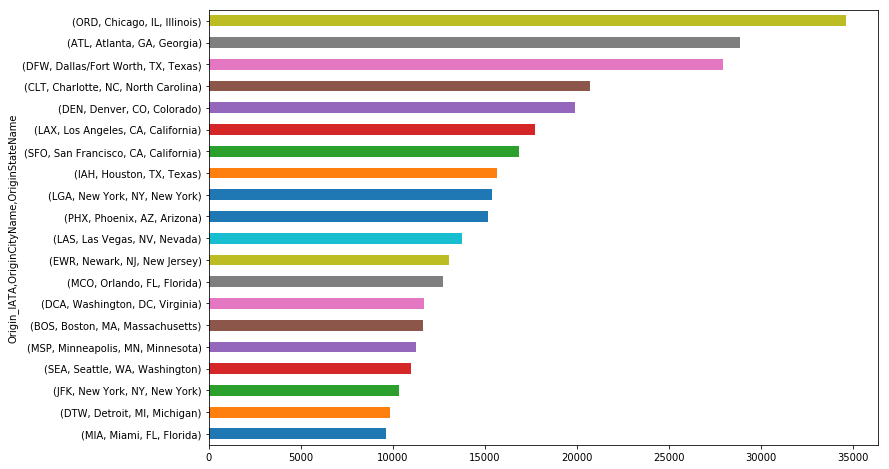

In [33]:
group_by_delayed_airport['Origin_IATA'].count().sort_values(ascending=True).tail(20).plot(kind='barh', figsize=(12,8))

 Percentage of flights delayed by airport:

In [317]:
group_by_delayed_airport2 = df.groupby(['Origin_IATA','delayed']).size().unstack()
group_by_delayed_airport2.head()

delayed,False,True
Origin_IATA,,
ABE,685,370
ABI,263,235
ABQ,3512,1713
ABR,115,65
ABY,179,63


In [318]:
group_by_delayed_airport2['total_flights'] = (group_by_delayed_airport2[True] + group_by_delayed_airport2[False])
group_by_delayed_airport2.head()

delayed,False,True,total_flights
Origin_IATA,,,
ABE,685,370,1055
ABI,263,235,498
ABQ,3512,1713,5225
ABR,115,65,180
ABY,179,63,242


In [319]:
group_by_delayed_airport2['proportion_delayed_flights'] = (group_by_delayed_airport2[True]/group_by_delayed_airport2['total_flights'])
group_by_delayed_airport2.head()

delayed,False,True,total_flights,proportion_delayed_flights
Origin_IATA,,,,
ABE,685,370,1055,0.350711
ABI,263,235,498,0.471888
ABQ,3512,1713,5225,0.327847
ABR,115,65,180,0.361111
ABY,179,63,242,0.260331


In [320]:
group_by_delayed_airport2['percentage'] = (group_by_delayed_airport2['proportion_delayed_flights'])*100
group_by_delayed_airport2.head()

delayed,False,True,total_flights,proportion_delayed_flights,percentage
Origin_IATA,,,,,
ABE,685,370,1055,0.350711,35.071090
ABI,263,235,498,0.471888,47.188755
ABQ,3512,1713,5225,0.327847,32.784689
ABR,115,65,180,0.361111,36.111111
ABY,179,63,242,0.260331,26.033058


In [321]:
group_by_delayed_airport2.sort_values(by='percentage', ascending=False).head(20)

delayed,False,True,total_flights,proportion_delayed_flights,percentage
Origin_IATA,,,,,
OGD,6,19,25,0.760000,76.000000
HGR,8,22,30,0.733333,73.333333
OWB,10,17,27,0.629630,62.962963
SCK,67,92,159,0.578616,57.861635
CYS,40,50,90,0.555556,55.555556
LCK,63,69,132,0.522727,52.272727
MEI,134,136,270,0.503704,50.370370
IAG,90,91,181,0.502762,50.276243
EGE,610,598,1208,0.495033,49.503311


##### Highest delayed Airports

ALL FLIGHTS

In [35]:
group_by_airport0 = df.groupby(['Origin_IATA', 'OriginCityName', 'OriginStateName'])

In [36]:
airports_delay = group_by_airport0['ArrDelayMin'].agg(['sum','mean', 'count'])
airports_delay.sample(5)

,,,sum,mean,count
Origin_IATA,OriginCityName,OriginStateName,,,
OGG,"Kahului, HI",Hawaii,10948.0,1.783643,6138
EYW,"Key West, FL",Florida,14586.0,9.634082,1514
YAK,"Yakutat, AK",Alaska,-1172.0,-7.371069,159
CDC,"Cedar City, UT",Utah,1651.0,10.720779,154
CWA,"Mosinee, WI",Wisconsin,3121.0,5.967495,523


In [37]:
airports_delay.sort_values(by='count', ascending=False).head(10)

,,,sum,mean,count
Origin_IATA,OriginCityName,OriginStateName,,,
ATL,"Atlanta, GA",Georgia,198017.0,2.201436,89949
ORD,"Chicago, IL",Illinois,1058274.0,14.429697,73340
DFW,"Dallas/Fort Worth, TX",Texas,521468.0,7.954300,65558
CLT,"Charlotte, NC",North Carolina,218222.0,4.058283,53772
DEN,"Denver, CO",Colorado,256521.0,4.799181,53451
LAX,"Los Angeles, CA",California,126220.0,2.440213,51725
PHX,"Phoenix, AZ",Arizona,119618.0,2.820780,42406
IAH,"Houston, TX",Texas,261284.0,6.184237,42250
LGA,"New York, NY",New York,287944.0,7.397595,38924


In [325]:
airports_delay.sort_values(by='mean', ascending=False).head(20)

,,,sum,mean,count
Origin_IATA,OriginCityName,OriginStateName,,,
JMS,"Jamestown, ND",North Dakota,12165.0,54.551570,223
MEI,"Meridian, MS",Mississippi,11671.0,44.888462,260
MMH,"Mammoth Lakes, CA",California,6786.0,38.338983,177
OTH,"North Bend/Coos Bay, OR",Oregon,2987.0,38.294872,78
DVL,"Devils Lake, ND",North Dakota,4972.0,35.514286,140
SLN,"Salina, KS",Kansas,7389.0,34.690141,213
LWB,"Lewisburg, WV",West Virginia,4583.0,33.948148,135
ASE,"Aspen, CO",Colorado,74533.0,33.649210,2215
APN,"Alpena, MI",Michigan,4365.0,32.333333,135


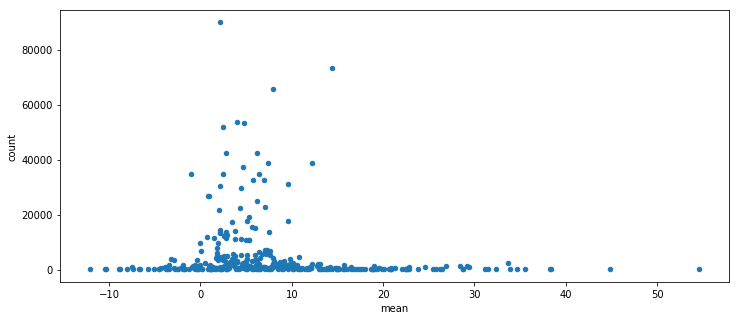

In [326]:
ax1 = airports_delay.plot.scatter('mean', 'count', figsize=(12,5))

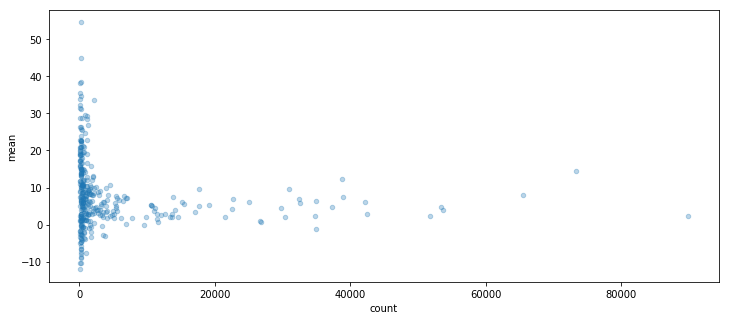

In [327]:
ax2 = airports_delay.plot.scatter('count', 'mean', figsize=(12,5), alpha=0.3)

(0, 12500)

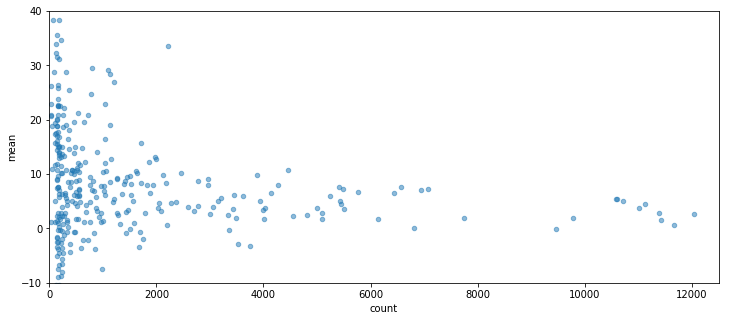

In [328]:
ax3 = airports_delay.plot.scatter('count', 'mean', figsize=(12,5), alpha=0.5)
ax3.set_ylim((-10,40))
ax3.set_xlim((0,12500))

In [329]:
airports_delay.sort_values(by='count', ascending=False).tail(15)

,,,sum,mean,count
Origin_IATA,OriginCityName,OriginStateName,,,
ELM,"Elmira/Corning, NY",New York,579.0,4.991379,116
SPN,"Saipan, TT",U.S. Pacific Trust Territories and Possessions,135.0,1.173913,115
ART,"Watertown, NY",New York,1953.0,17.283186,113
PSM,"Portsmouth, NH",New Hampshire,1265.0,11.712963,108
HTS,"Ashland, WV",West Virginia,1938.0,19.380000,100
CYS,"Cheyenne, WY",Wyoming,2591.0,28.788889,90
OTH,"North Bend/Coos Bay, OR",Oregon,2987.0,38.294872,78
STC,"St. Cloud, MN",Minnesota,1022.0,18.925926,54
SMX,"Santa Maria, CA",California,538.0,10.979592,49


In [48]:
normally_delayed_airports = airports_delay[(airports_delay['count'] > 50)]
normally_delayed_airports.sort_values(by='mean', ascending=False).head(10)

,sum,mean,count
Origin_IATA,,,
JMS,12165.0,54.551570,223
MEI,11671.0,44.888462,260
MMH,6786.0,38.338983,177
OTH,2987.0,38.294872,78
DVL,4972.0,35.514286,140
SLN,7389.0,34.690141,213
LWB,4583.0,33.948148,135
ASE,74533.0,33.649210,2215
APN,4365.0,32.333333,135


##### Highest delayed Airports In-depth Study

In [39]:
group_by_airport1 = df.groupby('Origin_IATA')

In [40]:
airports_delay = group_by_airport1['ArrDelayMin'].agg(['sum','mean', 'count'])
normally_delayed_airports = airports_delay[(airports_delay['count'] > 50)]
most_delayed = normally_delayed_airports.sort_values(by='mean', ascending=False).head(20)

In [41]:
most_delayed_names = most_delayed.index.tolist()

In [42]:
top_delayed_airports =  df[df['Origin_IATA'].isin(most_delayed_names)]

In [43]:
top_delayed_airports_pivots = top_delayed_airports.pivot_table(index='FlightDate', columns='Origin_IATA', values='ArrDelayMin')

In [44]:
top_delayed_airports_pivots.describe()

Origin_IATA,ABR,ACV,APN,ASE,CMX,CYS,DVL,EGE,FAR,GCC,JAC,JMS,LWB,MEI,MMH,OTH,PLN,RDM,SLN,SUX
count,89.000000,90.000000,83.000000,90.000000,81.000000,90.000000,86.000000,90.000000,90.000000,89.000000,90.000000,90.000000,84.000000,90.000000,75.000000,78.000000,87.000000,88.000000,87.000000,89.000000
mean,27.960674,26.056111,35.457831,32.918779,33.092593,28.788889,35.622093,29.779233,29.662748,29.769663,30.140354,49.925926,38.934524,46.420370,37.217778,38.294872,34.737548,33.640791,36.553640,27.067228
std,81.896735,40.615654,142.745001,41.261590,93.277915,78.737153,128.348055,72.987575,57.584694,110.174553,63.566431,126.275181,132.264129,109.159933,84.370389,167.195205,95.120964,66.154140,94.623982,79.994088
min,-33.500000,-18.600000,-49.000000,-19.480000,-35.000000,-29.000000,-37.000000,-20.000000,-19.117647,-29.500000,-24.500000,-40.000000,-47.500000,-30.000000,-24.333333,-29.000000,-42.333333,-29.500000,-23.500000,-29.800000
25%,-10.500000,-3.550000,-19.000000,3.119001,-11.500000,-9.750000,-18.875000,1.347222,-0.290414,-13.500000,-7.189394,-18.000000,-18.000000,-6.583333,-1.166667,-20.000000,-19.500000,-1.666667,-8.500000,-7.500000
50%,-3.500000,16.000000,-8.500000,19.876344,4.000000,2.000000,-8.500000,12.971805,13.066667,-4.500000,9.262500,-3.500000,-1.000000,10.166667,12.666667,-9.000000,-6.500000,13.211111,3.000000,7.333333
75%,20.000000,43.625000,33.500000,49.417375,37.000000,33.250000,16.125000,34.685897,43.776786,17.500000,43.301136,41.500000,36.250000,45.166667,42.416667,42.000000,41.750000,46.777778,38.166667,33.400000
max,392.000000,192.500000,1150.000000,207.368421,559.000000,463.000000,805.000000,616.250000,436.000000,608.500000,335.000000,562.500000,817.000000,685.000000,567.500000,1014.000000,475.000000,391.857143,481.500000,640.500000


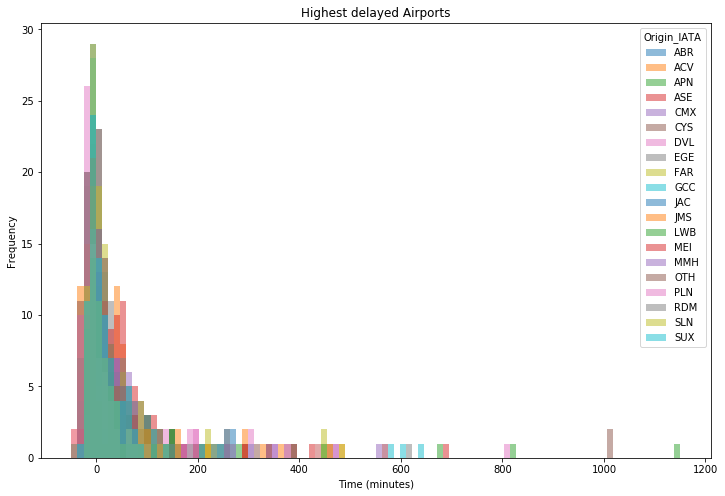

In [50]:
ax = top_delayed_airports_pivots.plot(kind='hist', bins=100, figsize=(12,8), alpha=0.5)
plt.title('Highest delayed Airports')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.show()

(-60, 500)

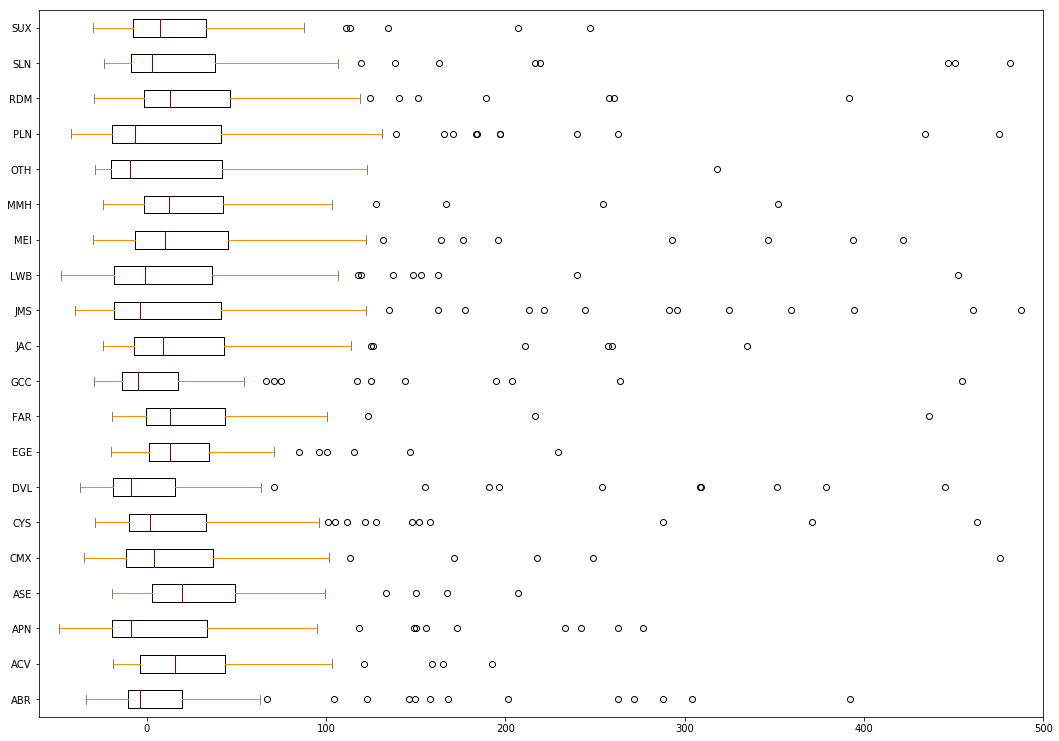

In [53]:
color = dict(boxes='Black', whiskers='DarkOrange', medians='DarkRed', caps='Gray')
box = top_delayed_airports_pivots.plot(kind='box', vert=False, color=color, figsize=(18,13))
box.set_xlim((-60,500))

ONLY DELAYED FLIGHTS

In [54]:
group_by_airport2 = delayed.groupby(['Origin_IATA', 'OriginCityName', 'OriginStateName'])

In [55]:
airports_delay2 = group_by_airport2['ArrDelayMin'].agg(['mean', 'count'])

In [56]:
airports_delay2.sort_values(by='count', ascending=False).head(10)

,,,mean,count
Origin_IATA,OriginCityName,OriginStateName,,
ORD,"Chicago, IL",Illinois,44.777608,34628
ATL,"Atlanta, GA",Georgia,31.487087,28847
DFW,"Dallas/Fort Worth, TX",Texas,33.055474,27905
CLT,"Charlotte, NC",North Carolina,28.376317,20690
DEN,"Denver, CO",Colorado,35.378659,19915
LAX,"Los Angeles, CA",California,36.365500,17710
SFO,"San Francisco, CA",California,45.986159,16834
IAH,"Houston, TX",Texas,37.292026,15639
LGA,"New York, NY",New York,46.400325,15365


In [57]:
airports_delay2.sort_values(by='mean', ascending=False).head(10)

,,,mean,count
Origin_IATA,OriginCityName,OriginStateName,,
JMS,"Jamestown, ND",North Dakota,170.655172,87
DVL,"Devils Lake, ND",North Dakota,145.400000,45
IMT,"Iron Mountain/Kingsfd, MI",Michigan,142.116279,43
PLN,"Pellston, MI",Michigan,134.230769,65
APN,"Alpena, MI",Michigan,128.872340,47
ITH,"Ithaca/Cortland, NY",New York,127.966102,59
OTH,"North Bend/Coos Bay, OR",Oregon,115.242424,33
BJI,"Bemidji, MN",Minnesota,114.304348,46
LWB,"Lewisburg, WV",West Virginia,114.218182,55


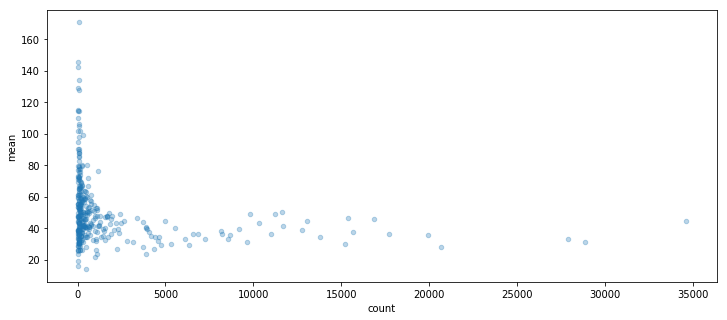

In [58]:
airports_delay2.plot.scatter('count', 'mean', figsize=(12,5), alpha=0.3)

(0, 5000)

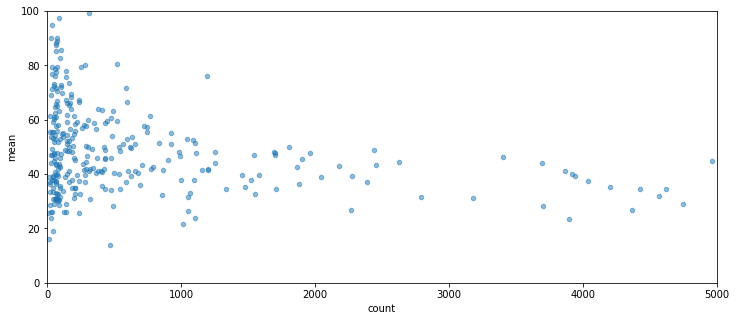

In [59]:
ax = airports_delay2.plot.scatter('count', 'mean', figsize=(12,5), alpha=0.5)
ax.set_ylim((0,100))
ax.set_xlim((0,5000))

In [60]:
normally_delayed_airports2 = airports_delay2[(airports_delay2['count'] < 5000)]
normally_delayed_airports2.sort_values(by='mean', ascending=False).head(10)

,,,mean,count
Origin_IATA,OriginCityName,OriginStateName,,
JMS,"Jamestown, ND",North Dakota,170.655172,87
DVL,"Devils Lake, ND",North Dakota,145.400000,45
IMT,"Iron Mountain/Kingsfd, MI",Michigan,142.116279,43
PLN,"Pellston, MI",Michigan,134.230769,65
APN,"Alpena, MI",Michigan,128.872340,47
ITH,"Ithaca/Cortland, NY",New York,127.966102,59
OTH,"North Bend/Coos Bay, OR",Oregon,115.242424,33
BJI,"Bemidji, MN",Minnesota,114.304348,46
LWB,"Lewisburg, WV",West Virginia,114.218182,55


##### Delays of the Top 20 airports by volume of flights

In [61]:
top_20_airports = df['Origin_IATA'].value_counts().head(20)

In [62]:
top_20_airports_names = top_20_airports.index.tolist()
top_20_airports_names

['ATL',
 'ORD',
 'DFW',
 'CLT',
 'DEN',
 'LAX',
 'PHX',
 'IAH',
 'SFO',
 'LGA',
 'LAS',
 'DTW',
 'MSP',
 'MCO',
 'DCA',
 'BOS',
 'EWR',
 'JFK',
 'SEA',
 'PHL']

In [63]:
top_volume_airports =  df[df['Origin_IATA'].isin(top_20_airports_names)]
top_volume_airports.sample(5)

,Unnamed: 0,Year,Quarter,Month,DayOfMonth,DayOfWeek,FlightDate,UniqueCarrier,Carrier,RegistrationNum,...,CRSElapsedTimeMin,ActualElapsedTimeMin,FlightTimeMin,NumberOfFlights,DistanceMil,Distance_Int250Mil,DepTime2,ArrTime2,DepDateTime,ArrDateTime
1196447,1196447,2019,1,2,26,2,2019-02-26,AA,AA,N146AA,...,257.0,248.0,214.0,1.0,1372.0,6,06:24,09:32,2019-02-26 06:24:00,2019-02-26 09:32:00
492666,492666,2018,4,12,26,3,2018-12-26,WN,WN,N969WN,...,90.0,78.0,67.0,1.0,407.0,2,12:28,13:46,2018-12-26 12:28:00,2018-12-26 13:46:00
474646,474646,2018,4,12,4,2,2018-12-04,UA,UA,N37267,...,105.0,154.0,77.0,1.0,550.0,3,16:02,18:36,2018-12-04 16:02:00,2018-12-04 18:36:00
166594,166594,2018,4,12,11,2,2018-12-11,YX,YX,N648RW,...,171.0,172.0,145.0,1.0,1091.0,5,11:56,15:48,2018-12-11 11:56:00,2018-12-11 15:48:00
960125,960125,2019,1,1,26,6,2019-01-26,UA,UA,N19130,...,284.0,289.0,262.0,1.0,2227.0,9,10:51,18:40,2019-01-26 10:51:00,2019-01-26 18:40:00


In [64]:
top_volume_airports.shape

(896395, 49)

In [65]:
top_volume_airports_pivots = top_volume_airports.pivot_table(index='FlightDate', columns='Origin_IATA', values='ArrDelayMin')
top_volume_airports_pivots.describe()

Origin_IATA,ATL,BOS,CLT,DCA,DEN,DFW,DTW,EWR,IAH,JFK,LAS,LAX,LGA,MCO,MSP,ORD,PHL,PHX,SEA,SFO
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.940241,8.839150,4.132944,6.285190,4.761622,7.949313,-0.489122,9.602827,6.000648,2.322570,4.775862,2.234895,5.749291,6.228466,2.890732,17.095579,0.887714,2.566109,5.088192,12.724018
std,10.491067,30.670567,8.484677,19.911498,11.752303,11.907225,20.064009,18.287228,12.371428,17.432338,11.816642,8.695192,23.454044,10.294778,27.361238,25.798087,11.438782,7.528043,21.711671,18.943867
min,-11.416999,-18.852564,-6.148410,-13.512262,-10.979764,-7.402157,-19.908072,-17.003145,-10.279720,-20.954930,-12.375000,-12.811828,-25.750000,-6.287599,-21.564987,-9.269514,-15.144695,-9.207627,-10.801858,-9.983871
25%,-3.836811,-7.685063,-0.891908,-3.636073,-2.610490,1.157403,-12.990347,-1.953601,-0.605354,-9.339589,-1.581423,-3.426834,-8.697322,0.085929,-12.044612,0.873559,-7.799183,-2.453491,-4.357276,-0.605650
50%,-1.303904,-0.544404,2.446334,1.048973,2.110046,5.288360,-6.843081,7.239415,2.725380,-1.560269,2.274021,1.175278,-2.087036,3.279786,-4.404190,8.211696,-1.151800,1.764777,-0.504142,5.806888
75%,5.157846,11.528253,6.494936,10.547609,9.205518,9.581063,5.849943,16.321054,9.674803,7.964403,9.148208,7.300049,10.557813,9.963080,9.860020,24.033598,5.697590,5.465870,5.771913,19.966469
max,60.176695,163.163636,52.125201,138.687500,61.296928,69.779528,103.277946,82.271565,76.308176,66.481183,72.587189,30.357877,85.560538,64.442029,155.720670,129.455399,39.977186,32.433538,123.269481,81.927577


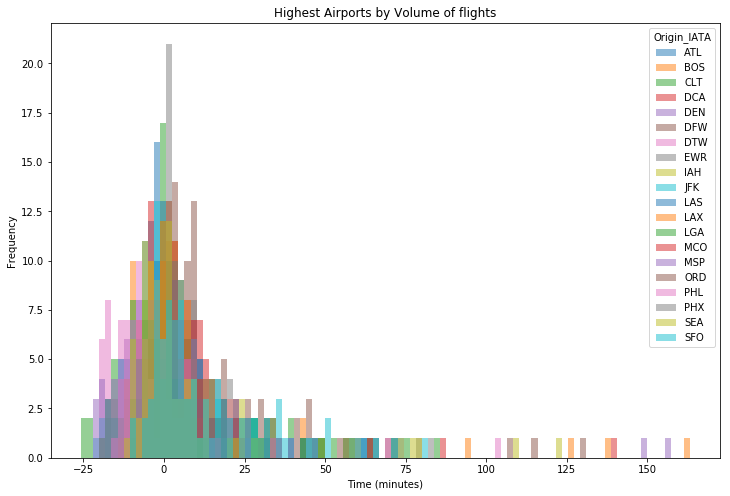

In [68]:
ax = top_volume_airports_pivots.plot(kind='hist', bins=100, figsize=(12,8), alpha=0.5)
plt.title('Highest Airports by Volume of flights')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.show()

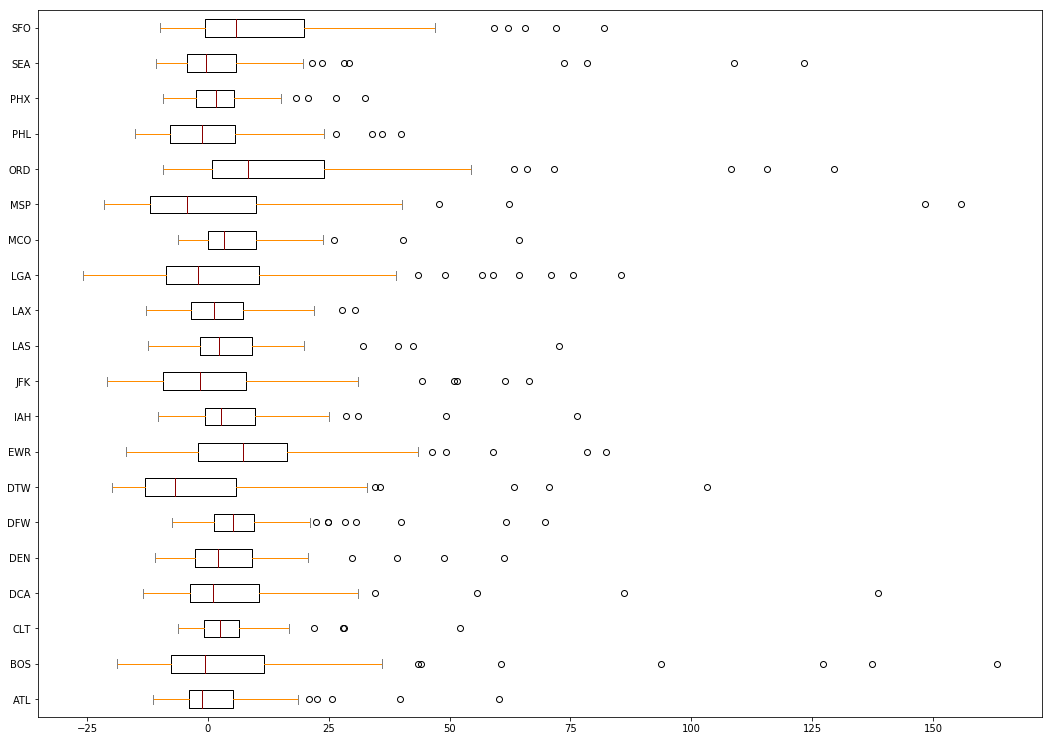

In [67]:
color = dict(boxes='Black', whiskers='DarkOrange', medians='DarkRed', caps='Gray')
top_volume_airports_pivots.plot(kind='box', vert=False, color=color, figsize=(18,13))

### Routes:

##### Most flown Routes by volume of flights

In [54]:
group_by_route = df.groupby(['Origin_IATA','Dest_IATA','FlightNum'])

In [503]:
most_flown = group_by_route['FlightNum'].count().sort_values(ascending=False)
most_flown.head(20)

Origin_IATA  Dest_IATA  FlightNum
SFO          JFK        16           179
EWR          MCO        1527         165
BOS          BWI        1027         164
ATL          MCO        1153         139
LAX          JFK        24           136
PHL          BOS        1776         134
CMH          ORD        3476         131
LAX          OAK        949          128
EWR          PHX        230          111
JFK          SFO        15           104
AUS          FLL        512          104
PHL          BOS        2660          99
LAS          DEN        764           95
IAH          MIA        1614          93
ATL          ORD        762           92
JFK          SJU        2571          90
CLT          GRR        5185          90
JFK          SYR        116           90
             SRQ        163           90
             MCO        1183          90
Name: FlightNum, dtype: int64

##### Most flown Routes by volume of flights, Origin = Top Volume of flights Airports

In [56]:
top_20_airports = df['Origin_IATA'].value_counts().head(20)
top_20_airports_names = top_20_airports.index.tolist()

In [57]:
top_volume_airports =  df[df['Origin_IATA'].isin(top_20_airports_names)]

In [71]:
group_by_route2 = top_volume_airports.groupby(['Origin_IATA','Dest_IATA','FlightNum'])   

In [72]:
most_flown2 = group_by_route2['FlightNum'].count().sort_values(ascending=False)
most_flown2.head(20)

Origin_IATA  Dest_IATA  FlightNum
SFO          JFK        16           179
EWR          MCO        1527         165
BOS          BWI        1027         164
ATL          MCO        1153         139
LAX          JFK        24           136
PHL          BOS        1776         134
LAX          OAK        949          128
EWR          PHX        230          111
JFK          SFO        15           104
PHL          BOS        2660          99
LAS          DEN        764           95
IAH          MIA        1614          93
ATL          ORD        762           92
DFW          RDU        2745          90
             SFO        2248          90
                        5483          90
             SGF        3767          90
             RDU        1155          90
             SGF        3793          90
                        3795          90
Name: FlightNum, dtype: int64

##### Most delayed Routes, average delay

In [346]:
delayed_routes = group_by_route['ArrDelayMin'].agg(['mean','count','std'])

In [356]:
delayed_routes.sort_values(by='mean', ascending=False).head(30)

,,,mean,count,std
Origin_IATA,Dest_IATA,FlightNum,,,
ATL,IAH,6237,1444.000000,1,NaN
CLT,MKE,3033,1431.000000,1,NaN
SEA,SFO,986,931.000000,1,NaN
ELP,DEN,5796,904.000000,1,NaN
SFO,SEA,986,902.000000,1,NaN
EWR,DAY,3969,889.000000,1,NaN
SFO,DEN,1604,877.000000,1,NaN
IAH,LIT,5210,828.000000,1,NaN
JAX,ORD,3074,705.500000,2,973.686038


In [348]:
delayed_routes.sort_values(by='count', ascending=False).head(30)

,,,mean,count,std
Origin_IATA,Dest_IATA,FlightNum,,,
SFO,JFK,16,0.342697,178,35.098095
EWR,MCO,1527,7.184049,163,53.926589
BOS,BWI,1027,24.540881,159,81.152750
ATL,MCO,1153,5.446043,139,31.813581
LAX,JFK,24,-13.503704,135,29.165476
PHL,BOS,1776,2.576923,130,36.769313
LAX,OAK,949,0.259843,127,23.688190
CMH,ORD,3476,0.500000,122,37.057750
EWR,PHX,230,30.045045,111,110.840376


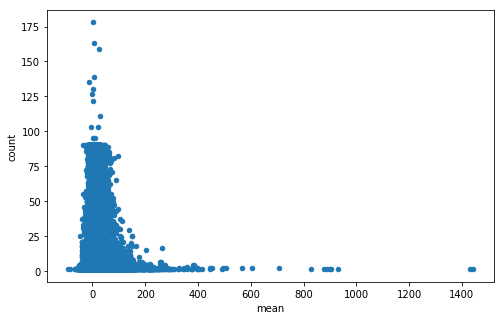

In [349]:
delayed_routes.plot.scatter('mean', 'count', figsize=(8,5))

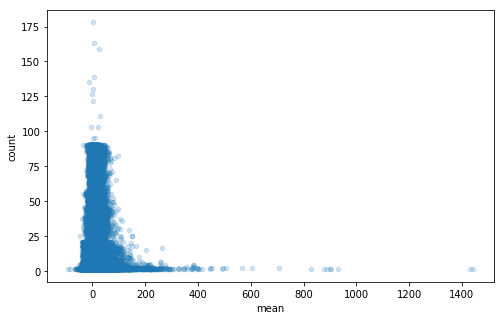

In [350]:
delayed_routes.plot.scatter('mean', 'count', figsize=(8,5), alpha=0.2)

In [351]:
normally_delayed_routes = delayed_routes[(delayed_routes['count'] >= 10) & (delayed_routes['count'] <= 90) & (delayed_routes['mean'] <= 400)]
normally_delayed_routes.sort_values(by='mean', ascending=False).head(20)

,,,mean,count,std
Origin_IATA,Dest_IATA,FlightNum,,,
ORF,ORD,5823,262.562500,16,452.059873
EGE,LAX,2511,203.000000,15,414.597912
BWI,DTW,3541,175.800000,10,385.751734
FSD,ORD,5257,163.333333,18,413.387583
RNO,LAX,5992,151.888889,18,374.107863
ORD,SDF,3178,150.600000,25,287.342711
FSD,ORD,5837,148.320000,25,313.276997
MTJ,ORD,3030,147.500000,20,377.782658
DFW,EWR,3682,144.181818,11,263.066082


In [355]:
normally_delayed_routes = delayed_routes[(delayed_routes['count'] >= 25) & (delayed_routes['count'] <= 75) & (delayed_routes['mean'] <= 400)]
normally_delayed_routes.sort_values(by='mean', ascending=False).head(20)

,,,mean,count,std
Origin_IATA,Dest_IATA,FlightNum,,,
ORD,SDF,3178,150.600000,25,287.342711
FSD,ORD,5837,148.320000,25,313.276997
SYR,EWR,4357,139.655172,29,265.809582
IAD,PWM,6203,112.944444,36,276.710777
MKE,ORD,4095,106.000000,30,199.992758
JAC,ORD,2475,105.756757,37,275.742674
ORD,FSD,5845,103.000000,25,237.189973
HPN,DTW,4138,98.522727,44,275.203391
CMH,EWR,4215,95.225806,31,184.213411


##### Most delayed Routes, by top volume of flights airports

In [150]:
delayed_routes2 = group_by_route2['ArrDelayMin'].agg(['mean','count'])

In [153]:
delayed_routes2.sort_values(by='count', ascending=False).head(20)

,,,mean,count
Origin_IATA,Dest_IATA,FlightNum,,
SFO,JFK,16,0.342697,178
EWR,MCO,1527,7.184049,163
BOS,BWI,1027,24.540881,159
ATL,MCO,1153,5.446043,139
LAX,JFK,24,-13.503704,135
PHL,BOS,1776,2.576923,130
LAX,OAK,949,0.259843,127
EWR,PHX,230,30.045045,111
JFK,SFO,15,-3.737864,103


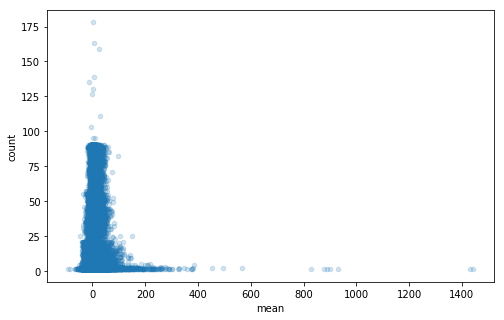

In [151]:
delayed_routes2.plot.scatter('mean', 'count', figsize=(8,5), alpha=0.2)

In [499]:
normally_delayed_routes2 = delayed_routes2[(delayed_routes2['count'] >= 10) & (delayed_routes2['count'] <= 90)]
top_routes_delayed = normally_delayed_routes2.sort_values(by='mean', ascending=False).head(20)
top_routes_delayed

mean  count
Origin_IATA Dest_IATA FlightNum                   
ORD         SDF       3178       150.600000     25
DFW         EWR       3682       144.181818     11
ATL         ORD       1671       133.400000     10
IAH         MSP       4670       120.666667     12
ATL         GNV       3362       120.636364     11
ORD         ORF       5818       117.687500     16
            CVG       4088       114.904762     21
DEN         MSO       2216       114.066667     15
MSP         IAH       3563       110.916667     12
CLT         ORD       2705       110.100000     10
ORD         XNA       4036       107.416667     12
DFW         LBB       5857       107.062500     16
ATL         ORD       5921       106.384615     13
            PHF       5145       106.300000     10
PHX         SEA       2094       105.700000     10
IAH         LBB       4020       105.176471     17
DFW         CVG       5263       104.000000     10
MSP         RST       4773       103.888889     18
ORD         FSD       5845       103.000000     25
EWR         DAY       4150       101.950000     20

### Carrier:

In [487]:
df.columns

Index(['Unnamed: 0', 'Year', 'Quarter', 'Month', 'DayOfMonth', 'DayOfWeek',
       'FlightDate', 'UniqueCarrier', 'Carrier', 'RegistrationNum',
       'FlightNum', 'OriginAirport_IDNum', 'OriginCityMarket_IDNum',
       'Origin_IATA', 'OriginCityName', 'OriginState_ID', 'OriginStateName',
       'OriginWAC', 'DestAirport_IDNum', 'DestCityMarket_IDNum', 'Dest_IATA',
       'DestCityName', 'DestState_ID', 'DestStateName', 'DestWAC',
       'CRSDepTime', 'DepTime', 'DepDelayMin', 'DepDelayMin0',
       'DepDelay_Ind15', 'DepDelayGroup_Int15', 'CRSArrTime', 'ArrTime',
       'ArrDelayMin', 'ArrDelayMin0', 'ArrDelay_Ind15', 'ArrDelayGroup_Int15',
       'Cancelled', 'Diverted', 'CRSElapsedTimeMin', 'ActualElapsedTimeMin',
       'FlightTimeMin', 'NumberOfFlights', 'DistanceMil', 'Distance_Int250Mil',
       'DepTime2', 'ArrTime2', 'DepDateTime', 'ArrDateTime', 'delayed'],
      dtype='object')

##### Most Flown Carriers

In [481]:
group_by_carrier = df.groupby('Carrier')

In [494]:
#How many carriers there are?
group_by_carrier['Carrier'].unique().count()

17

In [495]:
group_by_carrier['Carrier'].count().sort_values(ascending=False).head(20)

Carrier
WN    323839
AA    224197
DL    216179
OO    189192
UA    142167
YX     75180
MQ     74607
B6     72191
OH     67695
AS     60644
9E     59193
YV     53441
NK     43889
EV     38524
F9     28313
G4     21706
HA     20045
Name: Carrier, dtype: int64

##### Most Delayed Carriers by Aircraft Delay

In [361]:
group_by_aircraft = df.groupby('RegistrationNum')

In [362]:
aircraft_delay = group_by_aircraft['ArrDelayMin'].agg(['sum', 'mean', 'count'])

In [363]:
aircraft_delay.sort_values(by='mean', ascending=False).head(10)

,sum,mean,count
RegistrationNum,,,
N656YX,468.0,468.000000,1
N857AS,3806.0,135.928571,28
N2333U,372.0,124.000000,3
N272AY,2089.0,122.882353,17
N718AN,694.0,115.666667,6
N225UA,1148.0,114.800000,10
N736AT,102.0,102.000000,1
N2243U,299.0,99.666667,3
N36962,396.0,99.000000,4


In [364]:
aircraft_delay.sort_values(by='count', ascending=False).head(10)

,sum,mean,count
RegistrationNum,,,
N481HA,-854.0,-0.909478,939
N489HA,-1077.0,-1.156821,931
N488HA,-958.0,-1.035676,925
N485HA,-556.0,-0.615044,904
N483HA,-2571.0,-2.882287,892
N478HA,212.0,0.238202,890
N491HA,-1265.0,-1.445714,875
N490HA,-360.0,-0.419580,858
N495HA,41.0,0.048122,852


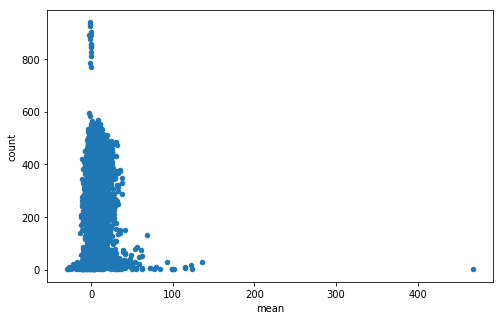

In [366]:
aircraft_delay.plot.scatter('mean', 'count', figsize=(8,5))

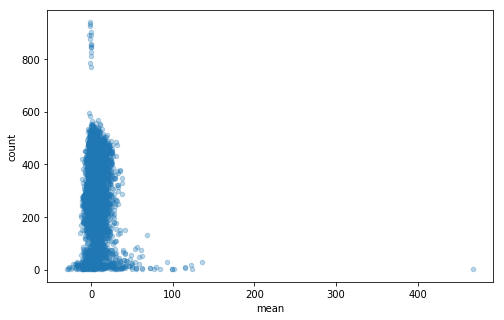

In [368]:
aircraft_delay.plot.scatter('mean', 'count', figsize=(8,5), alpha=0.3)

In [372]:
aircraft_delay.sort_values(by='count', ascending=False).tail(15)

,sum,mean,count
RegistrationNum,,,
N721AN,59.0,29.5,2
N2341U,3.0,1.5,2
N1607B,-23.0,-11.5,2
N866DA,84.0,84.0,1
N2332U,-6.0,-6.0,1
N504DN,29.0,29.0,1
N727AN,-9.0,-9.0,1
N736AT,102.0,102.0,1
N735AT,-24.0,-24.0,1


In [436]:
#Let's take the most aircraft delayed, with at least 20 delayed arrivals
normally_aircraft_delayed = aircraft_delay[(aircraft_delay['count'] >= 20) & (aircraft_delay['count'] <= 575)]
top_aircraft_delayed = normally_aircraft_delayed.sort_values(by='mean', ascending=False).head(20)

In [459]:
top_aircraft_delayed

,sum,mean,count
RegistrationNum,,,
N857AS,3806.0,135.928571,28
N276AY,2872.0,92.645161,31
N783CA,8937.0,68.746154,130
N101DU,3303.0,62.320755,53
N407SW,4511.0,60.959459,74
N218UA,1298.0,59.000000,22
N719EV,2867.0,58.510204,49
N741EV,4930.0,56.022727,88
N102DU,4232.0,54.256410,78


In [464]:
top_airline_by_aircratdelay = df.join(top_aircraft_delayed, on='RegistrationNum', how='inner')['Carrier'].unique()
top_airline_by_aircratdelay

array(['DL', 'EV', 'AA', 'YV', 'UA', 'B6', 'OO', 'G4'], dtype=object)

In [467]:
airlines_names = top_airline_by_aircratdelay.tolist()
airlines_delayed =  df[df['Carrier'].isin(airlines_names)]

In [470]:
top_airlines_delayed_pivots = airlines_delayed.pivot_table(index='FlightDate', columns='Carrier', values='ArrDelayMin')
top_airlines_delayed_pivots.describe()

Carrier,AA,B6,DL,EV,G4,OO,UA,YV
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,4.570523,13.082431,-1.727163,14.467111,6.790151,11.603559,6.531329,10.089813
std,7.774153,18.746316,10.224581,12.720152,8.850780,9.804346,9.863257,12.312252
min,-8.326733,-8.008963,-14.178304,-11.909836,-14.611111,-6.601531,-8.495526,-9.139959
25%,-1.397761,1.085377,-8.685922,4.355359,1.843512,4.665861,-0.479988,3.235350
50%,2.678205,6.609865,-4.198183,14.461176,8.001232,12.208967,4.406067,7.523001
75%,10.215948,22.461345,1.214559,22.735533,12.074207,18.062936,10.805628,12.620562
max,36.675687,103.902439,57.770842,51.285714,30.022857,45.376862,43.532716,75.633080


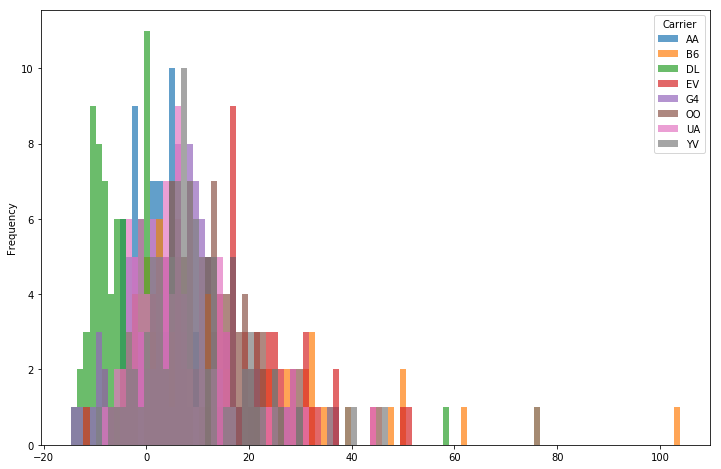

In [473]:
top_airlines_delayed_pivots.plot(kind='hist', bins=100, figsize=(12,8), alpha=0.7)

Which are the most common destinations for the most delayed airlines by aircraft delay ?

In [476]:
group_by_airport = airlines_delayed.groupby(['Origin_IATA', 'OriginCityName', 'Carrier'])
group_by_airport['Origin_IATA'].count().sort_values(ascending=False).head(20)

Origin_IATA  OriginCityName         Carrier
ATL          Atlanta, GA            DL         55276
DFW          Dallas/Fort Worth, TX  AA         34692
CLT          Charlotte, NC          AA         23530
ORD          Chicago, IL            UA         16973
                                    AA         15523
DEN          Denver, CO             UA         15046
IAH          Houston, TX            UA         14845
ORD          Chicago, IL            OO         14561
MSP          Minneapolis, MN        DL         14316
PHX          Phoenix, AZ            AA         13955
MIA          Miami, FL              AA         13408
EWR          Newark, NJ             UA         13344
SFO          San Francisco, CA      UA         12788
DTW          Detroit, MI            DL         12580
BOS          Boston, MA             B6         12407
PHL          Philadelphia, PA       AA         11824
SLC          Salt Lake City, UT     OO         11308
DEN          Denver, CO             OO         10627
MS